In [1]:
import wandb
import seaborn as sns
import pandas as pd

In [29]:
run = wandb.init(project="project-FootballPredict", group="eda", save_code=True)
local_path = '/home/orestas41/project-FootballPredict/lithuanian-football-league-predictor/data/2023-season-or-a-lyga-or-auksciausia-lietuvos-futbolo-lyga_2023-season_captured-list_2023-05-02_ae594079-2bd1-4857-ae86-974211d4b34c.csv'
df = pd.read_csv(local_path)

In [30]:
df.head(5)

,Position,Date,Home,Result,Away,Sanity check,Home-missing,Away-missing
0,1,NaN,NaN,NaN,NaN,11 turas,NaN,NaN
1,2,"2023-04-30, 17:55",Banga,0 : 2,Žalgiris,"2023-04-30, 17:55\t \tBanga\n\t0 : 2\t\nŽalgir...",Banga,Žalgiris
2,3,"2023-04-29, 18:00",Šiauliai,1 : 0,K. Žalgiris,"2023-04-29, 18:00\t \tŠiauliai\n\t1 : 0\t\nK. ...",Šiauliai,K. Žalgiris
3,4,"2023-04-29, 17:00",Dainava,2 : 2,Džiugas,"2023-04-29, 17:00\t \tDainava\n\t2 : 2\t\nDžiu...",Dainava,Džiugas
4,5,"2023-04-29, 13:00",Panevėžys,3 : 1,Riteriai,"2023-04-29, 13:00\t \tPanevėžys\n\t3 : 1\t\nRi...",Panevėžys,Riteriai


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Position      66 non-null     int64 
 1   Date          55 non-null     object
 2   Home          55 non-null     object
 3   Result        55 non-null     object
 4   Away          55 non-null     object
 5   Sanity check  66 non-null     object
 6   Home-missing  55 non-null     object
 7   Away-missing  55 non-null     object
dtypes: int64(1), object(7)
memory usage: 4.2+ KB


Position         0
Date            11
Home            11
Result          11
Away            11
Sanity check     0
Home-missing    11
Away-missing    11
dtype: int64

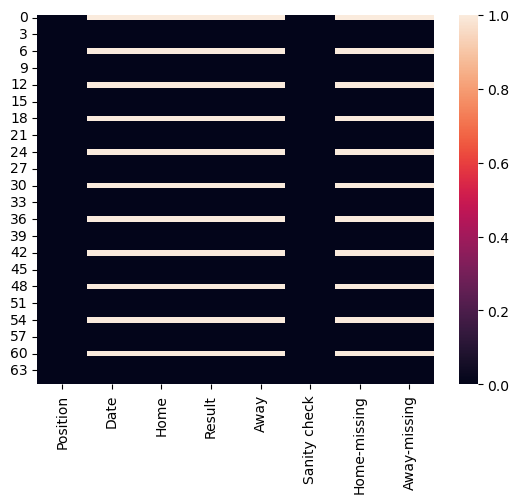

In [32]:
sns.heatmap(df.isnull())
df.isnull().sum()

In [33]:
df = df.dropna()

In [34]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d, %H:%M")

In [37]:
df = df.set_index('Date')

KeyError: "None of ['Date'] are in the columns"

In [38]:
for i in range(len(df)):
    if df['Home'][i] != df['Away'][i]:
        pass
    else:
        df['Home'][i] = df['Home-missing'][i]
        df['Away'][i] = df['Away-missing'][i]

/tmp/ipykernel_18627/1529351788.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Home'][i] = df['Home-missing'][i]
/tmp/ipykernel_18627/1529351788.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Away'][i] = df['Away-missing'][i]


In [39]:
for i in range(len(df)):
    if df['Home'][i] != df['Home-missing'][i] and df['Away'][i] != df['Away-missing'][i]:
        df['Home'][i] = df['Home-missing'][i]
        df['Away'][i] = df['Away-missing'][i]

/tmp/ipykernel_18627/2548103848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Home'][i] = df['Home-missing'][i]
/tmp/ipykernel_18627/2548103848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Away'][i] = df['Away-missing'][i]


In [40]:
score_strings = df['Result']
results = []
homeResult = []
awayResult = []

for score_string in score_strings:
    scores = score_string.split(' : ')
    home = int(scores[0])
    away = int(scores[1])
    homeResult.append(home)
    awayResult.append(away)

df['homeResult'] = homeResult
df['awayResult'] = awayResult

In [41]:
encoder = {}
        
for i in range(0, df['Home'].nunique()):
    encoder[df['Home'].unique()[i]] = i
    
encoder['Draw'] = 10

In [42]:
Winner = [0] * len(df)
for i in range(len(df)):
    if df['homeResult'][i] > df['awayResult'][i]:
        Winner[i] = df['Home'][i]
    elif df['homeResult'][i] < df['awayResult'][i]:
        Winner[i] = df['Away'][i]
    else:
        Winner[i] = 'Draw'

df['Winner'] = Winner

In [43]:
for i in range(0, df['Home'].nunique()):
    df = df.replace(encoder)

In [46]:
df = df.drop(['Position', 'Sanity check', 'Home-missing', 'Away-missing', 'Result'], axis=1)

KeyError: "['Position', 'Sanity check', 'Home-missing', 'Away-missing'] not found in axis"

In [ ]:
df.head(5)

In [ ]:
run.finish()